In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\data\ML\adult data\adult_dataset (3).csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [7]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [8]:
df.replace("?",np.nan,inplace = True)

In [9]:
df.dropna(inplace = True)

In [10]:
df.shape

(30162, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
len(df['native.country'].value_counts())

41

In [13]:
df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [14]:
k = df.select_dtypes("object").columns

In [15]:
M = list(k)

In [16]:
M

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [17]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [18]:
for columns in df.columns:
    if columns in M:
        print(columns,len(df[columns].value_counts()))

workclass 7
education 16
marital.status 7
occupation 14
relationship 6
race 5
sex 2
native.country 41
income 2


In [19]:
from sklearn import preprocessing

In [20]:
col = df[['native.country']]

In [21]:
type(col)

pandas.core.frame.DataFrame

In [22]:
le = preprocessing.LabelEncoder()
nc = col.apply(le.fit_transform)
nc.head()

,native.country
1,38
3,38
4,38
5,38
6,38


In [23]:
df.drop(['native.country'],axis=1 , inplace = True)

In [24]:
dummy = pd.get_dummies(df[['workclass','education','marital.status','occupation','relationship','race','sex','income']],drop_first=True)
df = pd.concat([df,dummy,nc],axis=1)

In [25]:
df.drop(['workclass','education','marital.status','occupation','relationship','race','sex','income'],axis=1 , inplace = True)

In [26]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_>50K,native.country
1,82,132870,9,0,4356,18,0,1,0,0,...,0,0,0,0,0,0,1,0,0,38
3,54,140359,4,0,3900,40,0,1,0,0,...,0,1,0,0,0,0,1,0,0,38
4,41,264663,10,0,3900,40,0,1,0,0,...,1,0,0,0,0,0,1,0,0,38
5,34,216864,9,0,3770,45,0,1,0,0,...,0,1,0,0,0,0,1,0,0,38
6,38,150601,6,0,3770,40,0,1,0,0,...,0,1,0,0,0,0,1,1,0,38


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   30162 non-null  int64
 1   fnlwgt                                30162 non-null  int64
 2   education.num                         30162 non-null  int64
 3   capital.gain                          30162 non-null  int64
 4   capital.loss                          30162 non-null  int64
 5   hours.per.week                        30162 non-null  int64
 6   workclass_Local-gov                   30162 non-null  uint8
 7   workclass_Private                     30162 non-null  uint8
 8   workclass_Self-emp-inc                30162 non-null  uint8
 9   workclass_Self-emp-not-inc            30162 non-null  uint8
 10  workclass_State-gov                   30162 non-null  uint8
 11  workclass_Without-pay                 301

In [28]:
df['income_>50K'].value_counts()

0    22654
1     7508
Name: income_>50K, dtype: int64

In [29]:
X = df.drop('income_>50K',axis =1)

In [30]:
y = df['income_>50K']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [33]:
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
y_pred = dt_default.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6754
           1       0.78      0.53      0.63      2295

    accuracy                           0.84      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.84      0.83      9049



In [34]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[6415  339]
 [1071 1224]]
0.8441816775334291


In [35]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

features = list(df.columns[1:])
features

['fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital.status_Married-AF-spouse',
 'marital.status_Married-civ-spouse',
 'marital.status_Married-spouse-absent',
 'marital.status_Never-married',
 'marital.status_Separated',
 'marital.status_Widowed',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occu

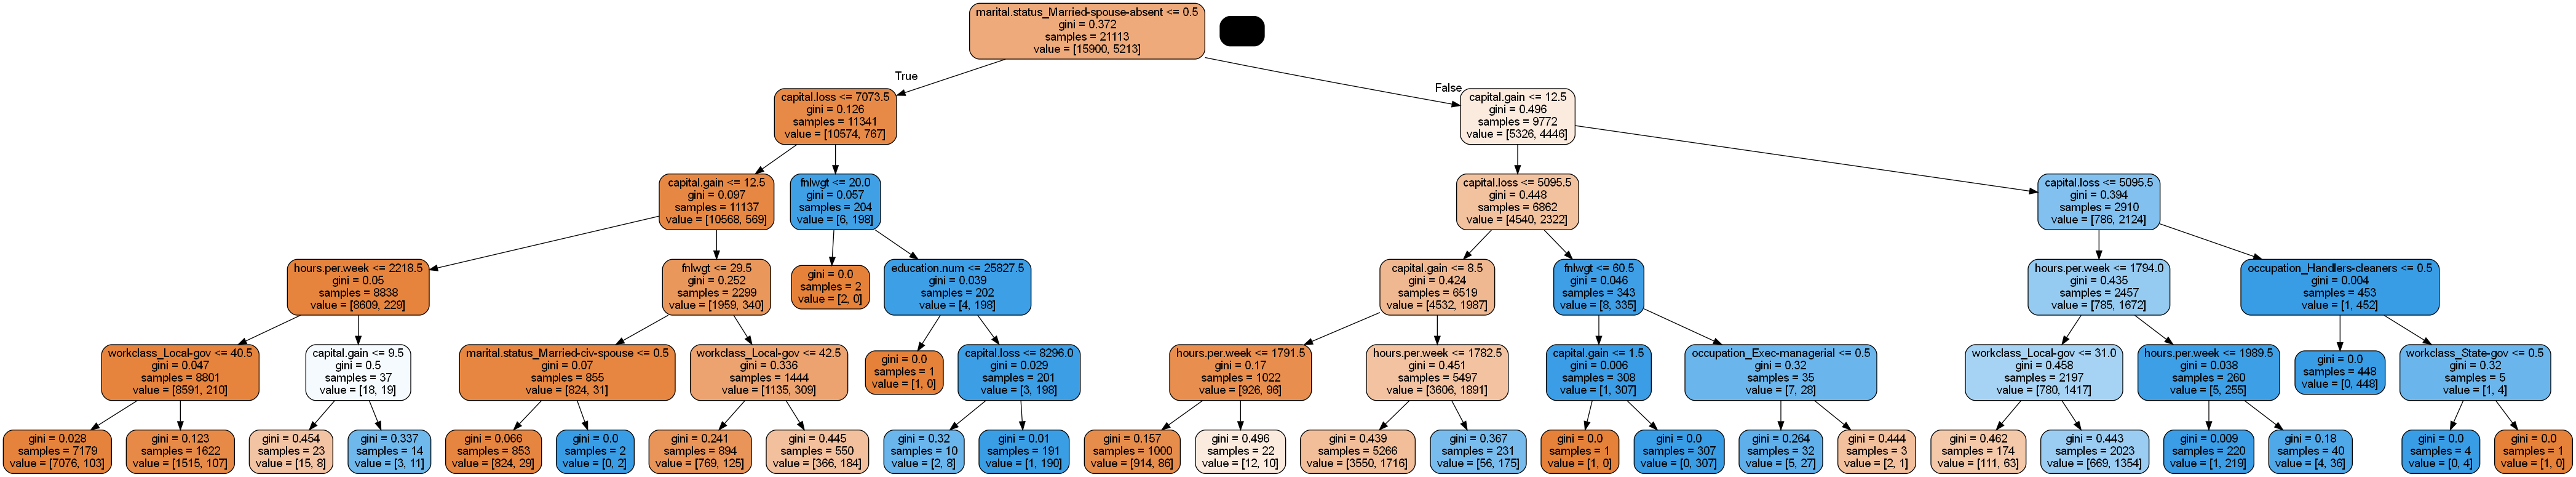

In [36]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'max_depth': range(1, 40)}

dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [38]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020570,0.004968,0.002879,0.003126,1,{'max_depth': 1},0.753019,0.753019,0.753019,0.753198,0.753198,0.753091,0.000087,39
1,0.028317,0.006139,0.000000,0.000000,2,{'max_depth': 2},0.820980,0.829268,0.823822,0.825912,0.826386,0.825274,0.002762,17
2,0.034639,0.004176,0.000000,0.000000,3,{'max_depth': 3},0.836609,0.844423,0.836135,0.843202,0.843676,0.840809,0.003647,11
3,0.038414,0.007326,0.002503,0.005007,4,{'max_depth': 4},0.836846,0.845134,0.835899,0.846992,0.842965,0.841567,0.004439,10
4,0.034533,0.006338,0.006271,0.007680,5,{'max_depth': 5},0.842529,0.847975,0.842766,0.851966,0.851729,0.847393,0.004126,7


In [46]:
best_params = tree.best_params_
best_score = tree.best_score_

In [47]:
best_params

{'max_depth': 9}

In [48]:
best_score

0.8543079881181228